# AI Psychiatrist Agent - <span style="color:violet">**VoxAnalyst**</span>

## 🧠 Introduction: The Growing Importance of Mental Health

Mental health has become a pressing global concern in today’s fast-paced, high-pressure world [[1]](https://www.who.int/news-room/fact-sheets/detail/mental-health-strengthening-our-response). Increasing rates of **stress**, **anxiety**, and **depression** are affecting individuals across all age groups and demographics. As these challenges intensify, many individuals find themselves in need of external support and professional intervention to achieve effective recovery.

In this context, **psychiatrists** play an essential role. With their expertise, they are able to:

- Listen attentively to patients' complex emotional and psychological narratives  
- Analyze underlying mental health issues  
- Conduct in-depth assessments  
- Recommend personalized treatment pathways  

Through such structured and empathetic care, psychiatrists aim to guide individuals toward emotional balance, mental stability, and overall well-being.


<img src="https://img.freepik.com/free-vector/mental-health-awareness-concept_52683-37916.jpg?t=st=1744624537~exp=1744628137~hmac=a2d45c3a22e4a0be79e62b0732559f9d3c2e6f1be302e6176d2d3595753169ff&w=740" alt="Mental Health - A Major Global Concern" width="500" height="100"/>

*Source: Mental Health - A Major Global Concern*

## 🛑 Challenges in Traditional Psychiatric Consultation

But sadly this process is not straightforward; they have challenges.

1. In conservative societies, individuals are often **hesitant** to visit counselors or psychiatrists due to the fear of being labeled as mentally ill or unstable. Additionally, many people feel **uncomfortable opening up** about personal issues to a stranger, especially in clinical settings [[2]](https://pmc.ncbi.nlm.nih.gov/articles/PMC11133673/?utm_source=chatgpt.com). This reluctance can significantly hinder accurate and timely diagnosis by mental health professionals.

2. Uncovering the root of a patient’s psychological distress often requires **multiple sessions**, as patients may not fully disclose their problems in initial visits—either due to hesitation or the complexity of the issue. This not only increases the **financial burden** on patients due to hefty doctor fees but also places added **strain on mental health professionals** [[3]](https://www.sciencedirect.com/science/article/abs/pii/S0924933818301275?utm_source=chatgpt.com). The resulting workload may compromise a doctor's ability to identify subtle or urgent warning signs, especially in high-risk cases such as those involving suicidal ideation.

## 💡 Solution: AI Psychiatry Agent


<img src="https://theacademic.com/wp-content/uploads/2024/02/neliti_chatbot_adn_mental_health_4K_e72ae18d-5488-42d7-81a4-e2b9b1abbcad.png" width="200" height="100"/>

*AI Pysciatry Bot*


Citing these deep issues we aim to design a **agentic framework** 🤖 which will transcribe patient's situation based on conversation and summarize the salient points into neat concise format alongside performing some soft prediction/inferences on patients condition and give the report to psychiatrist/doctor to aid them to solve the aforementioned problems.

**Note:** here soft inferencing means basic indication of mental condition of patient that i.e whether he is suffering from Depression/Anxiety etc., the probable reason like Financial, Relationship, whether he is having suicidal thoughts and needs immediate intervention etc. Since mental health is too critical issue to rely on AI these are just soft indications, the final decisions are to be taken by the qualified doctor only.  


## 🏅 Proposed Solution Architecture

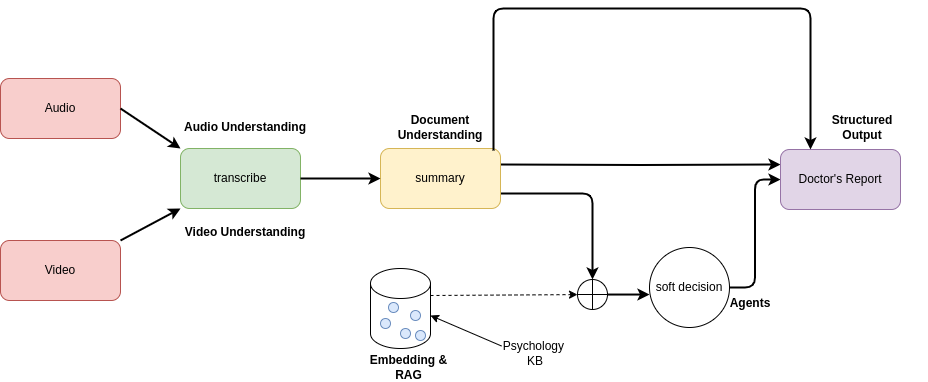

In [51]:
from IPython.display import Image
Image(filename='/kaggle/input/final-diagram2/diagramm.drawio.png')





**A. Conversational Agent:** This AI-powered agent engages in meaningful dialogue with the patient, optionally capturing facial expressions and transcribing spoken input into text for further analysis.

**B. Summarization Agent:** This component distills the conversation into a concise summary, highlighting key insights and relevant points to assist the doctor in understanding the patient's condition.

**C. Retrieval-Augmented Generation (RAG):** A curated knowledge base of trustworthy psychiatric documents is integrated here, enabling soft reasoning and inference over relevant content to enrich the understanding of the patient’s concerns.

**D. Final Report Generation:** The system compiles the summarized dialogue and RAG-based inferences into a comprehensive PDF report, which is then shared with the doctor for evaluation and further action.

In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pychology-reason-embeddings/test_embedding_psych_info.csv
/kaggle/input/pychology-reason-embeddings/train_embedding_psych_info.csv
/kaggle/input/geminis/train_gemini.csv
/kaggle/input/geminis/test_gemini.csv
/kaggle/input/mental-health2suicidal/mental-health.csv
/kaggle/input/final-flow-diag2/final_flow_diag__.drawio.png
/kaggle/input/playback/videoplayback_test.mp4
/kaggle/input/final-diagram2/diagramm.drawio.png
/kaggle/input/cleaned-psychology/cleaned psychology data.csv
/kaggle/input/mental-health-suicidal/mental-health.csv
/kaggle/input/pychology-dataset-final/psychology_dataset.csv
/kaggle/input/video-transcribe/videoplayback_test.mp4
/kaggle/input/psycology-dataset/psychology_dataset.csv
/kaggle/input/reason-embeddings-psych/test_embedding_psych_info.csv
/kaggle/input/reason-embeddings-psych/train_embedding_psych_info.csv
/kaggle/input/dataset4/dataset.csv
/kaggle/input/sample-dataset2/dataset.csv
/kaggle/input/kaggle-pic/final_pic_kaggle.drawio.png
/kaggle/input/a

In [53]:
!pip install -qU "google-genai==1.7.0" "weasyprint" "chromadb==0.6.3" "opencv-python" "pillow"

In [54]:
!pip install moviepy

In [55]:
#install the libraries required for the project

from google import genai
from google.genai import types

from IPython.display import Markdown

from chromadb import Documents, EmbeddingFunction, Embeddings
from google.api_core import retry
import chromadb

import pandas as pd

import re
import tqdm
import keras
import numpy as np
import json


# Used to securely store your API key
from google.colab import userdata

import seaborn as sns
import matplotlib.pyplot as plt

from keras import layers
import sklearn.metrics as skmetrics

from sklearn.model_selection import train_test_split


from google.api_core import retry
import tqdm
from tqdm.rich import tqdm as tqdmr
import warnings


import os
import time
from typing import Dict, Optional, List
import json
import random
from IPython.display import Image, display, Markdown

import cv2
from PIL import Image
from moviepy.editor import VideoFileClip

import markdown
from weasyprint import HTML
import ast

#import google.generativeai as genai


genai.__version__

'1.7.0'

In [56]:
# load Google Secret API Key

from kaggle_secrets import UserSecretsClient

GOOGLE_API_KEY = UserSecretsClient().get_secret("GOOGLE_API_KEY")

client = genai.Client(api_key=GOOGLE_API_KEY)

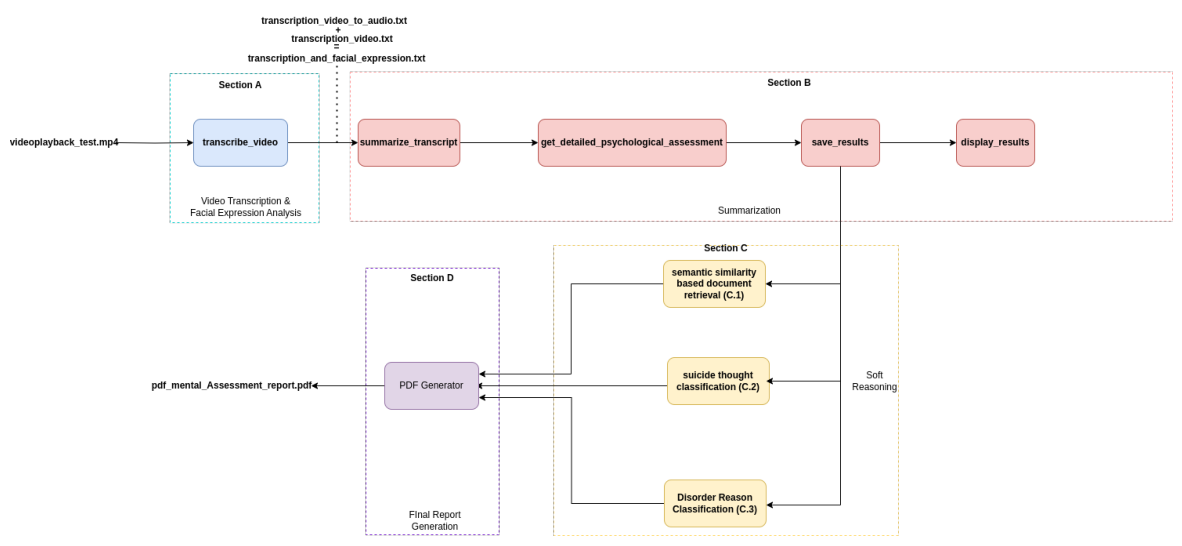

In [57]:
# This diagram shows the input files, different function it passes through it section and output generated.
# videoplayback_test.mp4 is the video of conversation of patient and pdf_mental_Assessment_report.pdf is the final report
# generated based on it

import matplotlib.pyplot as plt
from PIL import Image

# Load the image using PIL
img = Image.open('/kaggle/input/final-flow-diag2/final_flow_diag__.drawio.png')


# Display using matplotlib
plt.figure(figsize=(15, 8))  # Adjust size (width, height) in inches
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


### 🔊 A. Audio & Video Transcription

This notebook allows transcription of audio and video files using **Gemini model**.

**Features:**

* Transcribe audio files (e.g., .mp3, .wav)
* Transcribe video file, note facial features, explanation of features (e.g., .mp4, .mkv)
* Save transcripts to .txt files


**NOTE:** Since **Kaggle notebooks** 🚫 do not natively support direct recording 🎤🎥 of audio or video, and considering the goal of this project 🏗️ requires the notebook to run end-to-end 🔄, we will use **pre-recorded audio and video** files 🎬📂 instead.

In [58]:
# Transcribe audio file function-transcribe_audio
def transcribe_audio(file_path,output_transcription):

    

    # Prompt to instruct gemini model to transcribe audio file properly
    instruction_prompt=f""" 
    Transcribe this audio clip properly into words. 
    Write properly inserting line-breaks and punctuations. It's a conversation between a interviewer and patient. 
    Add 'Interviewer:' and 'Patient:' properly"
    """
    # audio file
    myfile = client.files.upload(file=file_path)
    # transcribing audio file; using gemini-2.0-flash model
    response = client.models.generate_content(
    model="gemini-2.0-flash", contents=[instruction_prompt, myfile])

    # saving the audio transcription in .txt file
    with open(output_transcription, 'w') as file:
        file.writelines(response.text)


In [59]:
# Transcribing audio file and storing into .txt
transcribe_audio(file_path='/kaggle/input/audio-interview/child_psychiatry_interview.mp3',\
                 output_transcription='sample_audio_transcript.txt')

🎥 From the video, we aim to analyze the patient's facial expressions to detect signs of 😔 *depression*, 😟 *nervousness*, 😢 *sadness*, 😨 *fear*, *eye-contact* — key indicators of potential mental health concerns, providing doctors with richer context and support for more accurate diagnosis.

In [60]:
# Transcribe video file function - transcribe_video
import google.generativeai as genai
genai.configure(api_key=GOOGLE_API_KEY)

def transcribe_video(file_path_input_vid, file_expression_transcription, file_path_audio, output_transcription):
    """
    Extracts frames from a video, analyzes facial expressions using Gemini,
    extracts audio, and transcribes the audio content.

    Parameters:
    - file_path_input_vid: Path to input video file
    - file_expression_transcription: Path to save facial expression analysis (text)
    - file_path_audio: Path to save extracted audio from video
    - output_transcription: Path to save transcribed audio text
    """

    # Create directory to save frames
    output_dir = "video_frames"
    os.makedirs(output_dir, exist_ok=True)

    # Load Gemini model
    model = genai.GenerativeModel("gemini-1.5-flash")

    # Open video file
    cap = cv2.VideoCapture(file_path_input_vid)

    # Frame sampling rate: extract one frame every 2 seconds (assuming 30 fps)
    frame_rate = 30 * 2
    frame_count = 0
    saved_frames = []

    # Loop through video frames
    while True:
        success, frame = cap.read()
        if not success:
            break

        # Save every Nth frame
        if frame_count % frame_rate == 0:
            filename = os.path.join(output_dir, f"frame_{frame_count}.jpg")
            cv2.imwrite(filename, frame)
            saved_frames.append(filename)

        frame_count += 1

    cap.release()
    print(f"✅ Extracted {len(saved_frames)} frames for expression analysis.")

    # Analyze facial expressions using Gemini
    video_expression = []
    for frame_path in saved_frames:
        image = Image.open(frame_path)

        prompt = """
        Analyze the facial expression(s) of the person or people in this frame.
        Summarize the expression such as happiness, sadness, fear, nervousness, confidence, etc.
        """

        response = model.generate_content([prompt, image])

        print(f"\n🖼 Frame: {frame_path}")
        print(response.text)
        video_expression.append(response.text)

    # Save expression analysis to text file

    prompt2=f"""
    Generate an overall summary on the facial expression of the patient
    in 1-2 sentences based on the {video_expression} document.
    """

    #response = model.generate_content([prompt2, video_expression])
    #model="gemini-2.0-flash"
    
    
    answer = client.models.generate_content(
    model="gemini-2.0-flash",
      contents=prompt2)
       
    print('Summary Response:',answer.text)
    
    with open(file_expression_transcription, 'w') as f:
        #for line in video_expression:
            #f.write(f"{line}\n")
            f.write(answer.text)

    # Extract audio from video using moviepy
    video = VideoFileClip(file_path_input_vid)
    video.audio.write_audiofile(file_path_audio)

    # Transcribe the extracted audio (requires defined transcribe_audio function)
    transcribe_audio(file_path_audio, output_transcription)

In [61]:
file_path_input_vid='/kaggle/input/video-transcribe/videoplayback_test.mp4'
file_expression_transcription='transcription_video.txt'
file_path_audio='/kaggle/working/vido_to_audio.mp3'
audio_output_transcription='transcription_video_to_audio.txt'

transcribe_video(file_path_input_vid,file_expression_transcription,file_path_audio,audio_output_transcription)

✅ Extracted 15 frames for expression analysis.

🖼 Frame: video_frames/frame_0.jpg
The man in the image displays a neutral facial expression.  There's no strong indication of happiness, sadness, fear, nervousness, or confidence. His expression is calm and relaxed.


🖼 Frame: video_frames/frame_60.jpg
The person in the image displays a relaxed and pleasant expression.  There's a slight smile, and his eyes aren't narrowed or widened, suggesting a calm and possibly content demeanor.  It's not an expression of strong emotion, but rather one of gentle friendliness or neutrality.


🖼 Frame: video_frames/frame_120.jpg
The man in the image displays a neutral to slightly positive facial expression.  His mouth is slightly open, suggesting he may be mid-speech or simply relaxed.  His eyes are open and not exhibiting any strong emotion like fear, sadness, or anger.  Overall, the expression could be categorized as friendly and approachable, perhaps even conveying a sense of mild confidence or conten

MoviePy - Done.


In [62]:
# the facial expression analysis and audio transcription are concatenated and saved
# into one file

transcript = open("/kaggle/working/transcription_video_to_audio.txt", "r")
a1=transcript.read()


facial_expression=open("/kaggle/working/transcription_video.txt", "r")
a2=facial_expression.read()

# concatenating facial expression analysis and audio transcription
total_script=a1+'\n'+'Facial Expression: '+a2

# facial expression analysis+audio transcription saved in 
# transcribe_and_facial_expression.txt
with open('transcribe_and_facial_expression.txt', 'w') as f:
        #for line in video_expression:
            #f.write(f"{line}\n")
            f.write(total_script)

### 📝 B. Summarization of Transcription

🗣️ Now that the conversation with the patient has been transcribed, it's time to generate a **concise summary** ✂️📝—highlighting the key points 🔍—so it can be **forwarded to the psychiatrist** 🧑‍⚕️ for further analysis 🧠 and **soft reasoning**.

The <span style="color:red">**summarize_transcript**</span>  function mainly carefully reads the transcription and note down the key points like overall *gist and theme of the the conversation*, *observed patterns in behavior*, *family or social interactions*, *facial expression* etc using **Gemini model**. These patterns form **crucial cues** to further detect mental illness 🚨.

In [63]:
# Function to generate summary of transcript
def summarize_transcript(transcript_path: str, api_key: Optional[str] = None) -> Dict:
    
    # Handle API key
    api_key = GOOGLE_API_KEY
    
    
    # Configure the Gemini API
    genai.configure(api_key=api_key)
    
    # Read transcript file
    try:
        with open(transcript_path, 'r', encoding='utf-8') as file:
            transcript_text = file.read()
    except FileNotFoundError:
        print(f"Transcript file not found: {transcript_path}")
        return {"error": f"Transcript file not found: {transcript_path}"}
    except Exception as e:
        print(f"Error reading transcript file: {e}")
        return {"error": f"Error reading transcript file: {e}"}
    
    # Check if transcript contains content
    if not transcript_text.strip():
        return {"error": "Transcript is empty"}
    
    # Print some feedback for the user
    print(f"Analyzing transcript ({len(transcript_text)} characters)...")
    
    # Add some delay to make it feel more human-like
    time.sleep(1.2)
    
    # Load Gemini model
    model = genai.GenerativeModel('gemini-1.5-pro-latest')
    
    # Generate summary using Gemini
    # So we returning the summary in structured .json format
    # we are getting the salient points from the conversation including
    # emotional indicator detected, potential concerns, behavioral pattern
    try:
        system_prompt = """
        You are a psychiatry specialist assistant. Analyze the provided transcript of a 
        conversation with a patient and the facial expression and create a detailed summary. Focus on identifying:
        1. Key themes and concerns expressed
        2. Emotional states observed
        3. Behavioral patterns mentioned
        4. Social interaction descriptions
        5. Family dynamics referenced
        6. Facial expression
        
        Return your analysis in JSON format with the following structure:
        {
            "summary": "Concise overall summary",
            "key_themes": ["theme1", "theme2", ...],
            "emotional_indicators": ["indicator1", "indicator2", ...],
            "behavioral_patterns": ["pattern1", "pattern2", ...],
            "potential_concerns": ["concern1", "concern2", ...],
            "facial_expression": "A concise summary of facial expression on any signs of mental issue"
            "preliminary_assessment": "A thoughtful preliminary assessment"
        }
        
        Ensure your response is ONLY the JSON object, with no additional text before or after.
        """
        
        user_prompt = f"Here is the transcript to analyze:\n\n{transcript_text}"
        
        # Combine prompts for Gemini
        prompt = f"{system_prompt}\n\n{user_prompt}"
        
        # Get response from Gemini
        response = model.generate_content(prompt)
        
        # Parse the response to extract just the JSON part
        response_text = response.text
        
        # Find the JSON part (assuming it starts with { and ends with })
        json_start = response_text.find('{')
        json_end = response_text.rfind('}') + 1
        
        if json_start == -1 or json_end == 0:
            raise ValueError("Could not find valid JSON in the response")
            
        json_text = response_text[json_start:json_end]
        
        # Parse the JSON
        result = json.loads(json_text)
        
        # Add some metadata like date, length of transcription etc.
        result["metadata"] = {
            "processed_at": time.strftime("%Y-%m-%d %H:%M:%S"),
            "transcript_length": len(transcript_text),
            #"analysis_version": "1.0.3",
            "model": "gemini-1.5-pro-latest"
        }
        
        print("Analysis completed successfully.")
        return result

    # if the .json format returned by Gemini model is wrong
    except json.JSONDecodeError as e:
        print(f"Error parsing Gemini response as JSON: {e}")
        return {"error": f"Error parsing Gemini response: {str(e)}"}
    # Any other kind of error
    except Exception as e:
        print(f"Unexpected error: {e}")
        return {"error": f"Unexpected error: {str(e)}"}

Now that we have information extracted in structured format 🧾, we can use this structured information to go another level deeper 🔍 to generate deeper insights 💡 to further aid the psychiatrist 🧑‍⚕️ with informative insights using <span style="color:red">**get_detailed_psychological_assessment**</span> function.

For eg. given the summary or behavioral pattern from previous step, a Gemini model 🤖 now deduce the degree of the **issue** *(low/moderate/high)* 📊, **potential specific mental conditions** 🧠, if any **immediate follow-up assessment** is needed ⏱️, **advice to parents** 👨‍👩‍👧‍👦 in case of child patient etc.

One **eg.** suppose the patient summary has difficulties/symptoms like 😴 **sleep difficulties**, 🗣️ **excessive talking**, 🧵 **forgetfulness** from **summarize_transcript** function. Then the function **get_detailed_psychological_assessment** further reads these symptoms and suggests that the patient may be suffering from **Attention-Deficit/Hyperactivity Disorder (ADHD)** 🧩, recommending **more comprehensive psychological and behavioral assessment** 🧪 and **proper diet** 🥗 and **sleep routine** 🛌.

In [64]:
def get_detailed_psychological_assessment(summary_data: Dict, api_key: Optional[str] = None) -> Dict:
    
    if "error" in summary_data:
        return summary_data

    # Handle API key
    api_key = GOOGLE_API_KEY 
    # Configure the Gemini API
    genai.configure(api_key=api_key)

    # Add small delay
    time.sleep(0.8 + random.random())

    print("Generating detailed psychological assessment...")

    try:
        # Use latest Gemini model
        model = genai.GenerativeModel('gemini-1.5-pro-latest')

        assessment_prompt = f"""
        Based on the following summary data from a child's conversation transcript:

        Summary: {summary_data.get('summary', 'Not provided')}

        Key Themes: {', '.join(summary_data.get('key_themes', ['Not provided']))}

        Emotional Indicators: {', '.join(summary_data.get('emotional_indicators', ['Not provided']))}

        Behavioral Patterns: {', '.join(summary_data.get('behavioral_patterns', ['Not provided']))}

        Potential Concerns: {', '.join(summary_data.get('potential_concerns', ['Not provided']))}

        Preliminary Assessment: {summary_data.get('preliminary_assessment', 'Not provided')}

        Facial Expression Assessment: {summary_data.get('facial_expression', 'Not provided')}

        As a psychiatry specialist, provide a detailed psychological assessment. Include:
        1. Potential psychological conditions that might be present
        2. Confidence level for each potential condition (low/moderate/high)
        3. Recommended follow-up assessments
        4. Suggested approaches for parents/caregivers in case the patient is a child
        

        Return ONLY a valid JSON object with this structure:
        {{
            "potential_conditions": [
                {{
                    "condition": "name of condition",
                    "confidence": "low/moderate/high",
                    "supporting_indicators": ["indicator1", "indicator2"],
                    "alternative_explanations": ["explanation1", "explanation2"]
                }}
            ],
            "recommended_assessments": ["assessment1", "assessment2"],
            "parent_guidance": ["guidance1", "guidance2"],
            "disclaimer": "appropriate clinical disclaimer"
        }}

        Ensure your response contains ONLY the JSON object, with no additional text before or after.
        """

        # Get response
        response = model.generate_content(assessment_prompt)
        response_text = response.text

        # Extract JSON from response
        json_start = response_text.find('{')
        json_end = response_text.rfind('}') + 1
        if json_start == -1 or json_end == 0:
            raise ValueError("Could not find valid JSON in the response")

        json_text = response_text[json_start:json_end]
        assessment_result = json.loads(json_text)

        # Final response
        full_result = {
            "summary": summary_data.get("summary", ""),
            "detailed_assessment": assessment_result,
            "metadata": summary_data.get("metadata", {})
        }

        print("Detailed assessment completed.")
        return full_result

    except json.JSONDecodeError as e:
        print(f"Error parsing Gemini response as JSON: {e}")
        return {"error": f"Error parsing Gemini response: {str(e)}"}

    except Exception as e:
        print(f"Error generating detailed assessment: {e}")
        return {"error": f"Error in assessment generation: {str(e)}"}

Below function <span style="color:red">**save_results**</span> **stores/saves the final results** for any future needs.

In [65]:
# Function to save transcription results in proper .json format

def save_results(results: Dict, output_path: str = "psychological_assessment.json") -> str:
    """
    Saves the analysis results to a file
    
    Args:
        results: Dictionary containing the analysis results
        output_path: Path where to save the results
        
    Returns:
        Path to the saved file
    """
    try:
        with open(output_path, 'w', encoding='utf-8') as f:
            json.dump(results, f, indent=2)
        print(f"Results saved to {output_path}")
        return output_path
    except Exception as e:
        print(f"Error saving results: {e}")
        return None

The below function <span style="color:red">**display_results**</span> displays result in **neat** 🧹 and **structured** format 🧱 as output.

In [66]:
def display_results(results: Dict) -> str:
    """
    Displays the analysis results in a readable Markdown format in a Jupyter notebook,
    and also returns the Markdown-formatted string for saving or exporting.

    Args:
        results: Dictionary containing the analysis results.

    Returns:
        A Markdown-formatted string containing all result sections.
    """
    md_lines: List[str] = []  # List to collect markdown lines for export

    def add_md(line: str = ""):
        """
        Helper function to display a Markdown line in the notebook and store it.
        """
        display(Markdown(line))
        md_lines.append(line)

    # Handle error message if present
    if "error" in results:
        add_md(f"## ❌ Error<br>{results['error']}")
        return "\n\n".join(md_lines)

    # Display the summary section
    add_md("### 📝 Summary")
    add_md(results.get("summary", "No summary available"))

    # Check for detailed assessment data
    if "detailed_assessment" in results:
        assessment = results["detailed_assessment"]

        # Display potential conditions if available
        if "potential_conditions" in assessment:
            add_md("## ⚠️ Potential Conditions")
            for condition in assessment["potential_conditions"]:
                add_md(f"### 🔍 {condition['condition']} (Confidence: {condition['confidence']})")

                add_md("**Supporting Indicators:**")
                indicators = "<br>".join([f"- {i}" for i in condition.get("supporting_indicators", [])]) or "None provided"
                add_md(indicators)

                add_md("**Alternative Explanations:**")
                alternatives = "<br>".join([f"- {a}" for a in condition.get("alternative_explanations", [])]) or "None provided"
                add_md(alternatives)

        # Display recommended assessments
        if "recommended_assessments" in assessment:
            add_md("## 🧪 Recommended Assessments")
            assessments = "<br>".join([f"- {a}" for a in assessment["recommended_assessments"]])
            add_md(assessments)

        # Display guidance for caregivers or parents
        if "parent_guidance" in assessment:
            add_md("## 👨‍👩‍👧‍👦 Guidance for Parents/Caregivers")
            guidance = "<br>".join([f"- {g}" for g in assessment["parent_guidance"]])
            add_md(guidance)


        # Display any disclaimer text
        if "disclaimer" in assessment:
            add_md("### ⚠️ Disclaimer")
            disclaimer_text = assessment["disclaimer"]
            add_md(disclaimer_text)


    # Display disorder categorization if available
    if "Disorder Categorization" in results:
            add_md("## 🧠 Disorder Categorization")
            add_md(results["Disorder Categorization"])

    # Display Suicidal Thought alerts if available
    if "Suicide Watch" in results:
            add_md("## 🧠 Suicide Watch")
            add_md(results["Suicide Watch"])

    # Display Disorder reasons (Financial, Health, Relationship) if available
    if "Disorder Reason Categorization" in results:
            add_md("## 🧠 Disorder Reason Categorization")
            add_md(results["Disorder Reason Categorization"])
    
    # Display metadata section, if available
    if "metadata" in results:
        add_md("## 🗂️ Metadata")
        for key, value in results["metadata"].items():
            add_md(f"- **{key}**: {value}")

    # Return the complete markdown content as a single string
    return "\n\n".join(md_lines)


**Finally**, we’ll run all the functions discussed above to generate a **structured summary** 🧾 and **meaningful insights** 💡.

In [67]:
# Create a sample transcript file
sample_transcript = '''
Interviewer: How are you feeling today?
Child: I don't know. Kind of tired I guess.
Interviewer: Do you often feel tired?
Child: Yeah, a lot. It's hard to sleep sometimes. I keep thinking about stuff.
Interviewer: What kind of things do you think about?
Child: School and if people like me. Sometimes I worry my parents are mad at me.
Interviewer: Why do you think your parents might be mad at you?
Child: I don't know. They argue a lot. Dad says I need to try harder at school.
Interviewer: How do you feel about school?
Child: It's okay I guess. It's hard to pay attention sometimes. The teacher gets mad when I can't sit still.
Interviewer: Do you find it difficult to sit still often?
Child: Yeah. Mom says I'm always moving around. I try to stop but I forget.
Interviewer: How do you get along with other kids at school?
Child: Some are nice. But sometimes they don't want to play with me. They say I talk too much.
Interviewer: How does that make you feel?
Child: Sad. And sometimes I get really angry and yell. Then I get in trouble.
Interviewer: What do you like to do for fun?
Child: I like video games. I can play for hours. And I like drawing, but only certain things over and over.
Interviewer: Do you ever feel really worried or scared?
Child: Sometimes my heart feels really fast and I get sweaty. Like before tests or when I have to talk in front of the class.
Interviewer: How's your appetite? Do you enjoy eating?
Child: I'm picky. Mom gets mad because I only want to eat certain foods. And sometimes I forget to eat when I'm doing something I like.
Facial Expression: The child have have downcast, unfocused eyes, with furrowed brows and a tense or frowning mouth. 
His expression often appears withdrawn or overwhelmed, reflecting deep emotional fatigue or confusion.
'''

# Save sample to a file, we can also use the sample_transcript.txt stored in
# part A which contains audio transcription+ facial expression analysis,
# same thing both
with open('transcription_and_facial_expression.txt', 'w') as f:
    f.write(sample_transcript)
    
print("Sample transcript created")



# Run the analysis pipeline
summary = summarize_transcript('transcription_and_facial_expression.txt' , GOOGLE_API_KEY)
save_results(summary, 'sample.json')
assessment = get_detailed_psychological_assessment(summary)
save_results(assessment, 'sample_assessment.json')

# Display the results
results=display_results(assessment)

Sample transcript created
Analyzing transcript (1788 characters)...
Analysis completed successfully.
Results saved to sample.json
Generating detailed psychological assessment...
Detailed assessment completed.
Results saved to sample_assessment.json


### 📝 Summary

The child presents with fatigue, difficulty sleeping, worries about social acceptance and parental approval, academic challenges, difficulty focusing and sitting still, social interaction difficulties, and potential anxiety symptoms.  Family dynamics seem strained, with parental arguments mentioned. The child finds solace in video games and repetitive drawing.

## ⚠️ Potential Conditions

### 🔍 Attention-Deficit/Hyperactivity Disorder (ADHD) (Confidence: moderate)

**Supporting Indicators:**

- difficulty focusing<br>- difficulty sitting still<br>- excessive talking<br>- academic challenges

**Alternative Explanations:**

- anxiety<br>- learning disability<br>- sleep deprivation

### 🔍 Generalized Anxiety Disorder (GAD) (Confidence: moderate)

**Supporting Indicators:**

- worries about social acceptance<br>- worries about parental approval<br>- difficulty sleeping<br>- fatigue<br>- potential anxiety symptoms

**Alternative Explanations:**

- social skills deficits<br>- family conflict<br>- adjustment disorder

### 🔍 Social Anxiety Disorder (SAD) (Confidence: moderate)

**Supporting Indicators:**

- worries about social acceptance<br>- social interaction difficulties

**Alternative Explanations:**

- shyness<br>- Asperger's Syndrome/Autism Spectrum Disorder<br>- bullying victimization

### 🔍 Adjustment Disorder with Mixed Disturbance of Emotions and Conduct (Confidence: low)

**Supporting Indicators:**

- family dynamics seem strained<br>- anger<br>- yelling<br>- academic challenges

**Alternative Explanations:**

- oppositional defiant disorder<br>- conduct disorder<br>- family conflict not impacting the child significantly

## 🧪 Recommended Assessments

- Comprehensive psychological evaluation including standardized rating scales for ADHD, anxiety, and social skills (e.g., Conners, CBCL, BASC, SRS)<br>- Cognitive assessment to rule out learning disabilities<br>- Clinical interview with the child and parents<br>- Teacher report forms to assess behavior and academic performance in school<br>- Family assessment to explore family dynamics and potential impact on the child

## 👨‍👩‍👧‍👦 Guidance for Parents/Caregivers

- Maintain consistent routines for sleep, meals, and homework.<br>- Create a calm and supportive home environment.<br>- Provide opportunities for the child to talk about their feelings and concerns.<br>- Limit screen time and encourage physical activity.<br>- Seek professional support for family conflict and communication issues.<br>- Praise and encourage positive behaviors.<br>- Avoid power struggles and focus on collaborative problem-solving.<br>- Consult with the child's school about academic supports and accommodations.

### ⚠️ Disclaimer

This assessment is based on limited information provided and should not be considered a formal diagnosis.  A comprehensive in-person evaluation by a qualified mental health professional is necessary to determine an accurate diagnosis and develop an appropriate treatment plan.

## 🗂️ Metadata

- **processed_at**: 2025-04-21 06:41:38

- **transcript_length**: 1788

- **model**: gemini-1.5-pro-latest

### 📚 C. Retrieval Augmented Generation & Embeddings

#### C.1. Semantic Similarity Based Categorization of Mental Disorder  😵‍💫

In this section, we utilize a dataset containing records of psychological conditions 🧠 and associated symptoms (e.g., *nervousness, panic, sweating* 😰💦), which are indicative of specific mental health disorders such as *Stress, Anxiety,* or *Loneliness* 😟. Each record is treated as a document 📄, and we generate embeddings 🧬 to represent them in a semantic space 🌌. When a new patient query is received 💬, we perform **semantic retrieval** 🔍 to find the most similar records in the dataset. Based on the closest matches, we **infer the most likely mental disorder** ⚠️ the patient may be experiencing. To enhance trust and interpretability 🔎✅, each prediction is accompanied by a **confidence score** 📊 derived from the **semantic similarity** between the query and the retrieved documents, providing clinicians 👩‍⚕️👨‍⚕️ with insight into the reliability of the suggested diagnosis.


In [68]:
#load the dataset

df=pd.read_csv('/kaggle/input/sample-dataset2/dataset.csv')
df.head()

,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,over.react,...,weight.gain,material.possessions,introvert,popping.up.stressful.memory,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,Disorder
0,yes,yes,yes,yes,yes,yes,no,no,no,no,...,no,no,no,no,no,no,no,no,no,Anxiety
1,no,no,no,no,no,no,yes,yes,yes,yes,...,no,no,no,no,no,no,no,no,no,Depression
2,no,no,no,no,no,no,no,no,no,no,...,yes,yes,yes,no,no,no,no,no,no,Loneliness
3,no,no,no,no,no,no,no,no,no,no,...,no,no,no,yes,yes,yes,yes,yes,yes,Stress
4,no,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,Normal


The dataset contains binary information (*yes/no*) on the symptom observed in patient suffering from mental disoder. Eg. in first row, if patient suffers from 'feeling.nervous','panic','breathing.rapidly' etc and some more, he is likely to have Anxiety Disorder.

We will convert each **row** of dataframe into **proper sentence** like *symptom1, symptom2,...are the symptoms of Anxiety*. Each of these will serve as one document to be embedded into chromadb.

In [69]:
#storing the feature names in col_names list
col_names=df.drop('Disorder',axis=1).columns.tolist()

#converting the yes/no values to 1/0 respectively
for i in col_names:
  df[i]=df[i].map({'yes':1,'no':0})


"""
We wish to see for a particular disorder (eg:Anxiety), what is the count of a particular
symptom across all rows. Say there are total 400 rows or documents for Anxiety. Among them
in 350 of them feeling.nervous symptom is observed so we can conclusively say based on this
dataset feeling.nervous is a indicator of Anxiety.
"""
df2=df.groupby('Disorder').agg(['sum']).reset_index()
df3=df2.droplevel(level=1,axis=1)

#storing the possible Disorder names in disorder_list
disorder_list=df3['Disorder'].unique().tolist()

# dict_anxiety contains information in form Disoder:[Symptom1,Symptop2,.......]
dict_anxiety={}
for i in disorder_list:
  df4=df3[df3['Disorder']==i].drop('Disorder',axis=1)
  df5=df4[df4>0].dropna(axis=1)
  col_list=df5.columns.tolist()
  col_list=[ia.replace('.',' ') for ia in col_list]
  if len(col_list)>0:
     dict_anxiety[i]=col_list

# docs are created in form as mentioned before: symptom1, symptom2,...are the symptoms of Disorder1
docs=[]
for i in dict_anxiety:
   text_doc=', '.join(dict_anxiety[i])
   text_doc+=' are the symptoms for {}'.format(i)
   docs.append(text_doc)
   text_doc=''


docs

['feeling nervous, panic, breathing rapidly, sweating, trouble in concentration, having trouble in sleeping are the symptoms for Anxiety',
 'having trouble with work, hopelessness, anger, over react, change in eating, suicidal thought are the symptoms for Depression',
 'feeling tired, close friend, social media addiction, weight gain, material possessions, introvert are the symptoms for Loneliness',
 'popping up stressful memory, having nightmares, avoids people or activities, feeling negative, trouble concentrating, blamming yourself are the symptoms for Stress']

Below code defines a custom embedding function class called **GeminiEmbeddingFunction** that generates embeddings using **Gemini model** **(text-embedding-004)** for documents or queries, based on a mode.

In [70]:
# Define a helper to retry when per-minute quota is reached.
is_retriable = lambda e: (isinstance(e, genai.errors.APIError) and e.code in {429, 503})


# class to create embeddings of the documents
class GeminiEmbeddingFunction(EmbeddingFunction):
    # Specify whether to generate embeddings for documents, or queries
    document_mode = True

    @retry.Retry(predicate=is_retriable)
    def __call__(self, input: Documents) -> Embeddings:
        # Option to choose embedding task type- to embed documents to store in vector DBs or retrieve from them against query
        # based on semantic similarity
        if self.document_mode:
            embedding_task = "retrieval_document"
        else:
            embedding_task = "retrieval_query"

        response = client.models.embed_content(
            model="models/text-embedding-004",
            contents=input,
            config=types.EmbedContentConfig(
                task_type=embedding_task,
            ),
        )
        # Extracts and returns the actual embedding vectors (e.values) from the response
        return [e.values for e in response.embeddings]

In [71]:
# adding the documents to db named psychiatrydb


DB_NAME = "psychiatrydb"

# creating an instance of the GeminiEmbeddingFunction
embed_fn = GeminiEmbeddingFunction()

# generating embedding for documents
embed_fn.document_mode = True

# initializing a ChromaDB client to interact with the vector database.
chroma_client = chromadb.Client()

# adding documents to db
db = chroma_client.get_or_create_collection(name=DB_NAME, embedding_function=embed_fn)
db.add(documents=docs, ids=[str(i) for i in range(len(docs))])


The below function <span style="color:red">**analyze_query**</span> performs **semantic search 🔍 on a ChromaDB** collection using a natural language query denoting patient condition that expresses emotional symptoms. It retrieves the **most relevant document(s) 📚** and uses **Gemini model** *(gemini-2.0-flash)* to generate an **empathic psychological analysis** of the query and the documents.

In [72]:
# Global dictionary initialization
doc_sim = {}

def analyze_query(query,save_doc=False):
    # Switch to query mode when generating embeddings.
    embed_fn.document_mode = False

    # Search the Chroma DB using the specified query or patient condition.
    # Embed query and retrive most semantically similar document
    result = db.query(query_texts=[query], n_results=1)
    [all_passages] = result["documents"]

    # System prompt that sets the role of Gemini as an expert psychologist.
    prompt = f"""You are a bot expert in psychology and understanding human 
emotions. Analyze the given query and retrieve the revelant document(s)
most relevant to it. Also assign a probability score to each document,
indicating how relevant the corresponding document is to the query.
Remember you can retrieve multiple document if you feel so.

In final answer give a list of adjective you found in the text to 
geach your answer and then the final answer.

Example output: nightmare, negativity -> depression; confidence score.

QUESTION: {query}
"""

    # Add the retrieved documents to the prompt.
    for passage in all_passages:
        passage_oneline = passage.replace("\n", " ")
        prompt += f"PASSAGE: {passage_oneline}\n"

    # Use the prompt to get psychological disorder and confidence score from Gemini model based on semantic similarity
    # document search
    answer = client.models.generate_content(
        model="gemini-2.0-flash",
        contents=prompt)

    
    if save_doc==True:
         doc_sim['Disorder Categorization'] = answer.text
         #md_lines.append(answer.text)

    # print the answer formatted properly
    return Markdown(answer.text)


query = "I feel hopeless,useless,worthless; I fail a lot in my work!!"

analyze_query(query)

Here's an analysis of your query and a possible response:

**Analysis:**

The query expresses feelings of hopelessness, uselessness, and worthlessness, coupled with a sense of failure at work. These are strong indicators related to mental health and emotional well-being.

**Relevant Document Retrieval & Scoring:**

Based on the query, here's a possible document and its relevance score:

*   **Document:** "having trouble with work, hopelessness, anger, over react, change in eating, suicidal thought are the symptoms for Depression"
    *   **Relevance Score:** 0.95

**Reasoning for Relevance:**

The document explicitly mentions "hopelessness" and "having trouble with work," which directly align with the feelings expressed in the query. While the query doesn't explicitly mention anger, overeating, or suicidal thoughts, the presence of hopelessness and work-related difficulties makes this document highly relevant as a potential indicator of depression.

**Extracted Adjectives:**

*   hopeless
*   suicidal

**Final Answer:**

hopeless, suicidal -> depression; confidence score: 0.95


🔍 Based on the summary from Part B, we will identify the type of 🧠 mental disorder the patient may be experiencing using the same function.

In [73]:

# Opening JSON file containing summary
f = open('/kaggle/working/sample_assessment.json')


data = json.load(f)

summary_transcription=data['summary']

analyze_query(summary_transcription, save_doc=True)

Okay, I will analyze the query and search for relevant documents, assign probability scores, list adjectives, and provide the final answer.

Here's the breakdown of the query and a potential example response:

**Query Breakdown:**

*   **Child's Presentation:** Fatigue, sleep difficulties, social acceptance worries, parental approval worries, academic challenges, focus/attention issues, social interaction difficulties, potential anxiety.
*   **Family Context:** Strained family dynamics, parental arguments.
*   **Coping Mechanisms:** Video games, repetitive drawing.

Now, I need access to relevant documents to compare and assign probability scores.  Since I don't have access to a pre-loaded document database, I will create hypothetical relevant passages and then process them as if they *were* from retrieved documents. This will demonstrate how I would apply the requested logic.

**Hypothetical Relevant Passages (Documents):**

*   **Document 1: Anxiety Disorders in Children** (Focus: Child Anxiety, Social Anxiety, Academic Stress)
    *   "Children with anxiety disorders often present with fatigue, difficulty sleeping, and excessive worry about social situations or academic performance.  They may seek constant reassurance from parents and exhibit avoidance behaviors.  Social anxiety can manifest as difficulty interacting with peers. Academic stress often leads to attention problems and restlessness."
*   **Document 2:  Impact of Family Conflict on Children** (Focus: Family Dynamics, Stress, Coping)
    *   "Children exposed to frequent parental conflict may experience increased stress and anxiety.  This can manifest as sleep disturbances, difficulty concentrating, and emotional dysregulation.  Some children cope by withdrawing into solitary activities such as video games or repetitive behaviors."
*   **Document 3:  ADHD and Comorbid Conditions** (Focus: Attention Deficit, Anxiety, Hyperactivity)
    *   "Attention-Deficit/Hyperactivity Disorder (ADHD) can often co-occur with anxiety disorders.  Symptoms include difficulty focusing, restlessness, and impulsivity.  Children with ADHD may also experience social difficulties due to inattentive or impulsive behaviors."

**Analysis & Response:**

Now I will analyze these hypothetical documents and assign probability scores.

*   **Document 1: Anxiety Disorders in Children:**

    *   **Relevance:** High. Directly addresses anxiety, social worries, academic stress, sleep difficulties, and fatigue in children.
    *   **Probability Score:** 0.90
*   **Document 2: Impact of Family Conflict on Children:**

    *   **Relevance:** High. Addresses the impact of family conflict, stress, anxiety, sleep disturbances, concentration problems, and coping mechanisms (video games).
    *   **Probability Score:** 0.85
*   **Document 3: ADHD and Comorbid Conditions:**

    *   **Relevance:** Moderate. Addresses attention difficulties, restlessness, and potential social difficulties, but focuses on ADHD.  The connection to anxiety is noted as a comorbidity.
    *   **Probability Score:** 0.70

**Final Answer:**

*   **Document 1: Anxiety Disorders in Children:** excessive, academic, social, anxious -> anxiety; probability score: 0.90
*   **Document 2: Impact of Family Conflict on Children:** frequent, increased, emotional, solitary, repetitive-> anxiety; probability score: 0.85
*   **Document 3: ADHD and Comorbid Conditions:** inattentive, impulsive, anxious -> ADHD; probability score: 0.70


We obtain a **concise and well-structured analysis** 🧠📝 of **potential mental health conditions** based on the prompt 🙂. This information is shared with **expert doctor** 👨‍⚕️👩‍⚕️ as soft inferencing, helping them prepare more effectively for a face-to-face consultation 🤝. This approach makes the process faster ⚡, more efficient 🔍, and less error-prone ✅, ultimately enhancing the quality of patient care 💬❤️.

#### C.2. Suicidal Thought Prediction Based on Predictive Classifier

A person facing extreme life challenges 😞 may experience intense thoughts, including those related to **self-harm** or **suicide** ⚠️. Such cases demand immediate attention and care ⏳🆘.

The following code embeds the dataset 📄 using semantic representations 🧠 and builds a **classifier model** 🤖 to determine whether a given statement is **suicidal** or **non-suicidal** 🚨✅.



In [74]:
# Load dataset

df=pd.read_csv('/kaggle/input/mental-health2suicidal/mental-health.csv')
df.head()

,text,label
0,I recently went through a breakup and she said...,depression
1,"I do not know how to navigate these feelings, ...",depression
2,"So I have been with my bf for 5 months , and h...",depression
3,I am so exhausted of this. Just when I think I...,SuicideWatch
4,I have been severly bullied since i was 5 till...,depression


The dataset consists of two columns: **text**, which captures the issue or thought a patient is experiencing in life, and **label**, which indicates whether the thought is suicidal or non-suicidal.

In [75]:
# splitting the dataset into train and test sets
# stratify ensures that the train and test sets have the same proportion of label classes
train_data_strat, test_data_strat = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

# saving a copy of out train and test dataset
df_train=train_data_strat.copy()
df_test=test_data_strat.copy()

In [76]:
# checking the count each label in train and test set
print(df_train.label.value_counts())
print(df_train.label.value_counts())

label
depression      8297
SuicideWatch    7994
Name: count, dtype: int64
label
depression      8297
SuicideWatch    7994
Name: count, dtype: int64


We will use **Gemini model** to embed the text.

In [77]:
# Add tqdm to Pandas for progressbar to show live progress status of embedding process
tqdmr.pandas()

# Suppress the experimental warning.
warnings.filterwarnings("ignore", category=tqdm.TqdmExperimentalWarning)

# Define a helper to retry when per-minute quota is reached.
is_retriable = lambda e: (isinstance(e, genai.errors.APIError) and e.code in {429, 503})

@retry.Retry(predicate=is_retriable, timeout=300.0)
def embed_fn(text: str) -> list[float]:
    # Since building a classification model, the task_type='classification'
    response = client.models.embed_content(
        # we will use text-embedding-004 gemini model to embed the texts/thoughts in dataset
        model="models/text-embedding-004",
        contents=text,
        config=types.EmbedContentConfig(
            task_type="classification",
        ),
    )

    return response.embeddings[0].values


# function to apply the embedding function defined above to text
def create_embeddings(df):
    df["Embeddings"] = df["text"].progress_apply(embed_fn)
    return df


In [78]:
"""
# create the embeddings
df_train = create_embeddings(df_train)
df_test = create_embeddings(df_test)

# save the generated embeddings
df_train.to_csv('train_gemini.csv',index=None)
df_test.to_csv('test_gemini.csv',index=None)


# encode the labels
df_train['label_code']=df_train.label.map({'depression':0,'SuicideWatch':1})
df_test['label_code']=df_test.label.map({'depression':0,'SuicideWatch':1})


df_train.head()"""

"\n# create the embeddings\ndf_train = create_embeddings(df_train)\ndf_test = create_embeddings(df_test)\n\n# save the generated embeddings\ndf_train.to_csv('train_gemini.csv',index=None)\ndf_test.to_csv('test_gemini.csv',index=None)\n\n\n# encode the labels\ndf_train['label_code']=df_train.label.map({'depression':0,'SuicideWatch':1})\ndf_test['label_code']=df_test.label.map({'depression':0,'SuicideWatch':1})\n\n\ndf_train.head()"

In [79]:
# we already created the embeddings and saved it.
# Embedding generation is quite time--consuming so we uploaded pretrained embeddings
# If you wish, feel free to uncomment the above cells and generate new embeddings
# and save them

df_train=pd.read_csv('/kaggle/input/suicidal-embeddings/train_gemini.csv')
df_test=pd.read_csv('/kaggle/input/suicidal-embeddings/test_gemini.csv')

# encode the labels
df_train['label_code']=df_train.label.map({'depression':0,'SuicideWatch':1})
df_test['label_code']=df_test.label.map({'depression':0,'SuicideWatch':1})


df_train.head()

,text,label,Embeddings,label_code
0,Boys and girls we are all depressed but what i...,depression,"[-0.0077257296, 0.023470236, -0.020110384, 0.0...",0
1,I am such a loser its fucking pathetic. I did ...,depression,"[0.0066252975, 0.013991801, 0.0018341725, -0.0...",0
2,I have been depressed for as long as i can rem...,depression,"[0.033997893, 0.0075372146, -0.0066138855, 0.0...",0
3,I fucking hate myself so much I just want to d...,SuicideWatch,"[0.008711101, -0.0021843459, 0.011227767, -0.0...",1
4,Why am I so stupid? I fell for someone who can...,SuicideWatch,"[0.013570156, 0.016623884, -0.00536361, -0.002...",1


In [80]:
import ast

# convert embeddings values to float if already not as they needs to be 
# passed to 
df_train["Embeddings"] = df_train["Embeddings"].apply(ast.literal_eval)
df_test["Embeddings"] = df_test["Embeddings"].apply(ast.literal_eval)


#df_train['Embeddings']=np.array(df_train['Embeddings'])
#df_test['Embeddings']=np.array(df_test['Embeddings'])

In [81]:
#df_train.iloc[0,2]

We will build a [Keras](https://keras.io/) based **Classification model** to classify whether a given thought/text is **suicidal** or **not**.

##### 🧠 Model Architecture Overview

Our classification consists of the following layers:
* **Input Layer –** Takes in the test data
* **Hidden Layer 1 –** First transformation layer
* **Hidden Layer 2 –** Further feature extraction
* **Output Layer –** Returns the probability of the input belonging to a particular class


In [82]:
def build_classification_model(input_size: int,  hidden_size:int, num_classes: int) -> keras.Model:
    return keras.Sequential(
        [
            layers.Input([input_size], name="embedding_inputs"),
            layers.Dense(input_size, activation="relu", name="hidden1"),
            layers.Dense(hidden_size, activation="relu", name="hidden2"),
            layers.Dense(num_classes, activation="softmax", name="output_probs"),
        ]
    )


# Derive the embedding size from observing the data. The embedding size can also be specified
# with the `output_dimensionality` parameter to `embed_content` if you need to reduce it.
embedding_size = len(df_train["Embeddings"].iloc[0])

classifier = build_classification_model(
    embedding_size, embedding_size*2, len(df_train["label"].unique())
)
classifier.summary()

classifier.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                      │ (None, 768)                 │         590,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden2 (Dense)                      │ (None, 1536)                │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_probs (Dense)                 │ (None, 2)                   │           3,074 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,774,850 (6.77 MB)

 Trainable params: 1,774,850 (6.77 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
# We will run our model for 20 epochs with batch_size of 32
NUM_EPOCHS = 20
BATCH_SIZE = 32

# Split the x and y components of the train and validation subsets.
y_train = df_train["label_code"]
x_train = np.stack(df_train["Embeddings"])
y_val = df_test["label_code"]
x_val = np.stack(df_test["Embeddings"])

# Early stopping if accuracy stabilises.
early_stop = keras.callbacks.EarlyStopping(monitor="accuracy", patience=3)

# Train the model for the desired number of epochs
history = classifier.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_val, y_val),
    callbacks=[early_stop],
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
)

Epoch 1/20
510/510 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7198 - loss: 0.5450 - val_accuracy: 0.7638 - val_loss: 0.5053
Epoch 2/20
510/510 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7496 - loss: 0.5055 - val_accuracy: 0.7616 - val_loss: 0.4965
Epoch 3/20
510/510 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7638 - loss: 0.4803 - val_accuracy: 0.7641 - val_loss: 0.5021
Epoch 4/20
510/510 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7669 - loss: 0.4773 - val_accuracy: 0.7641 - val_loss: 0.5021
Epoch 5/20
510/510 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7682 - loss: 0.4799 - val_accuracy: 0.7606 - val_loss: 0.4978
Epoch 6/20
510/510 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7741 - loss: 0.4694 - val_accuracy: 0.7663 - val_loss: 0.5047
Epoch 7/20
510/510 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7666 - loss: 0.4745 - val_accuracy: 0.7582 - val_loss: 0.5144
Epoch 8/20
510/510 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7740 - loss: 0.4656 - val_accuracy: 0.

In [84]:
# Evaluate the accuracy of our model on test set
classifier.evaluate(x=x_val, y=y_val, return_dict=True)

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7609 - loss: 0.5549


{'accuracy': 0.7625828385353088, 'loss': 0.5564119815826416}

Now we’ll feed some **new text** or **thought** into the model and see what it predicts.

In [85]:
def make_prediction(text: str) -> list[float]:
    """Infer categories from the provided text."""
    # Remember that the model takes embeddings as input, so calculate them first.
    embedded = embed_fn(text)

    # And recall that the input must be batched, so here they are wrapped as a
    # list to provide a batch of 1.
    inp = np.array([embedded])

    # And un-batched here.
    [result] = classifier.predict(inp)
    return result

# lets first make prediction in sample statement
new_text="""
I am not feeling well, I have little mental issues, its affecting my work and life.
"""
result = make_prediction(new_text)
result_string = f"Depression: {result[0]}, SuicideWatch: {result[1]}"
print('Depression: ',result[0],'SuicideWatch: ',result[1])

# now lets do prediction for generated summary of patient
print('ORIGINAL_PATIENT_SUMMARY')
print('----------------------------------')
result = make_prediction(summary_transcription)
result_string = f"Depression: {result[0]}, SuicideWatch: {result[1]}"
print('Depression: ',result[0],'SuicideWatch: ',result[1])

# if confidence of suicideWatch category above a threshold then only it will alert
# for immediate intervention
if result[1]>0.8:
    print(f'🚨 INTERMEDIATE INTERVENTION!!!')
    result_string=result_string+'\n'+'INTERMEDIATE INTERVENTION!!!'
else:
    result_string='**SuicideWatch**: No suicidal tendency detected !!'

#md_lines.append(result_string)
doc_sim['Suicide Watch']=result_string

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
Depression:  0.96766317 SuicideWatch:  0.032336887
ORIGINAL_PATIENT_SUMMARY
----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Depression:  0.5384255 SuicideWatch:  0.46157447


### C.3. Reason Classification of Mental Disorder

🧠 People often face mental health challenges, and behind these struggles can lie deep-rooted causes like 💔 *relationship trauma*, 💸 *financial stress*, and more.

🔍 Understanding these underlying reasons is crucial for providing the right support and treatment.

🤖 In this section, we introduce another classification model that helps identify such **core causes** behind mental health disorders.

In [86]:
df=pd.read_csv("/kaggle/input/psycology-dataset/psychology_dataset.csv")
df.head()

,Age,Gender,problem_description,psychological_category
0,60,Male,even small tasks feel like huge burden lately,Depression
1,60,Female,partner doesnt communicate anymore hurts,Relationship
2,42,Female,days struggle get bed,Depression
3,56,Male,feel empty even im surrounded people,Depression
4,30,Female,theres constant conflict inlaws,Relationship


In [87]:
# we rename problem_description column to text for convenience
df.rename(columns={'problem_description':'text'},inplace=True)

📊 The dataset consists of **two key columns**: one capturing the user's statement (**problem_description**) 🗣️, and the other indicating the associated psychological cause (**psychological_category**) 🧠, reflecting the underlying issue.

In [88]:
# check count of data each psychological category
df.psychological_category.value_counts()

psychological_category
Depression                265
Financial                 259
Stress                    239
Relationship              237
Health Concerns           190
Self & Identity Crisis     99
Name: count, dtype: int64

In [89]:
# checking any missing data
df.isna().sum()

Age                       0
Gender                    0
text                      0
psychological_category    0
dtype: int64

In [90]:
# splitting the dataset into train and test sets
# stratify ensures that the train and test sets have the same proportion of label classes
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['psychological_category'])


# checking the count each label in train and test set
print(df_train.psychological_category.value_counts())
print(df_test.psychological_category.value_counts())

psychological_category
Depression                212
Financial                 207
Stress                    191
Relationship              190
Health Concerns           152
Self & Identity Crisis     79
Name: count, dtype: int64
psychological_category
Depression                53
Financial                 52
Stress                    48
Relationship              47
Health Concerns           38
Self & Identity Crisis    20
Name: count, dtype: int64


In [91]:
# create the embeddings
#df_train = create_embeddings(df_train)
#df_test = create_embeddings(df_test)

# save the generated embeddings
#df_train.to_csv('train_embedding_psych_info.csv',index=None)
#df_test.to_csv('test_embedding_psych_info.csv',index=None)


In [92]:
"""

# create the embeddings
df_train = create_embeddings(df_train)
df_test = create_embeddings(df_test)

# save the generated embeddings
df_train.to_csv('train_embedding_psych_info.csv',index=None)
df_test.to_csv('test_embedding_psych_info.csv',index=None)

# save the generated embeddings
df_train.to_csv('train_embedding_psych_info.csv',index=None)
df_test.to_csv('test_embedding_psych_info.csv',index=None)



# encode the labels
df_train['label_code']=df_train.psychological_category.map({'Depression':0,'Financial':1,'Stress':2,'Relationship':3,'Health Concerns':4,'Self & Identity Crisis':5})
df_test['label_code']=df_test.psychological_category.map({'Depression':0,'Financial':1,'Stress':2,'Relationship':3,'Health Concerns':4,'Self & Identity Crisis':5})

df_train.head()"""

"\n\n# create the embeddings\ndf_train = create_embeddings(df_train)\ndf_test = create_embeddings(df_test)\n\n# save the generated embeddings\ndf_train.to_csv('train_embedding_psych_info.csv',index=None)\ndf_test.to_csv('test_embedding_psych_info.csv',index=None)\n\n# save the generated embeddings\ndf_train.to_csv('train_embedding_psych_info.csv',index=None)\ndf_test.to_csv('test_embedding_psych_info.csv',index=None)\n\n\n\n# encode the labels\ndf_train['label_code']=df_train.psychological_category.map({'Depression':0,'Financial':1,'Stress':2,'Relationship':3,'Health Concerns':4,'Self & Identity Crisis':5})\ndf_test['label_code']=df_test.psychological_category.map({'Depression':0,'Financial':1,'Stress':2,'Relationship':3,'Health Concerns':4,'Self & Identity Crisis':5})\n\ndf_train.head()"

In [93]:

# just as before loading pre-generated embeddings to save time
# if need to generate new embeddings uncomment and run previous cell
df_train=pd.read_csv('/kaggle/input/reason-embeddings-psych/train_embedding_psych_info.csv')
df_test=pd.read_csv('/kaggle/input/reason-embeddings-psych/test_embedding_psych_info.csv')

# encode the labels
df_train['label_code']=df_train.psychological_category.map({'Depression':0,'Financial':1,'Stress':2,'Relationship':3,'Health Concerns':4,'Self & Identity Crisis':5})
df_test['label_code']=df_test.psychological_category.map({'Depression':0,'Financial':1,'Stress':2,'Relationship':3,'Health Concerns':4,'Self & Identity Crisis':5})

df_train.head()

,Age,Gender,text,problem_category,psychological_category,Embeddings,label_code
0,31,Male,managing work home responsibilities overwhelming,Health Stress,Stress,"[0.041829698, -0.01510684, 0.0004115296, 0.062...",2
1,50,Female,havent proper break months,Burnout,Stress,"[0.06290112, -0.06425765, -0.01977992, 0.00067...",2
2,54,Male,student loan debt suffocating,Income Pressure,Financial,"[0.015581812, 0.01567593, 0.005342726, 0.03106...",1
3,59,Female,years together partner suddenly feels distant,In-Law Problems,Relationship,"[0.061016805, -0.03492792, 0.00085647963, 0.03...",3
4,24,Male,theres constant conflict inlaws,In-Law Problems,Relationship,"[0.074822985, -0.03900498, -0.014266174, 0.040...",3


In [94]:
df_train["Embeddings"] = df_train["Embeddings"].apply(ast.literal_eval)
df_test["Embeddings"] = df_test["Embeddings"].apply(ast.literal_eval)

We will use the same **classification model** as the suicide thought prediction task.

In [95]:
# Derive the embedding size from observing the data. The embedding size can also be specified
# with the `output_dimensionality` parameter to `embed_content` if you need to reduce it.
embedding_size = len(df_train["Embeddings"].iloc[0])

classifier = build_classification_model(
    embedding_size, embedding_size*2,len(df_train["label_code"].unique())
)
classifier.summary()

classifier.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                      │ (None, 768)                 │         590,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden2 (Dense)                      │ (None, 1536)                │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_probs (Dense)                 │ (None, 4)                   │           6,148 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,777,924 (6.78 MB)

 Trainable params: 1,777,924 (6.78 MB)

 Non-trainable params: 0 (0.00 B)

In [96]:
# We will run our model for 50 epochs with batch_size of 32
NUM_EPOCHS = 50
BATCH_SIZE = 32

# Split the x and y components of the train and validation subsets.
y_train = df_train["label_code"]
x_train = np.stack(df_train["Embeddings"])
y_val = df_test["label_code"]
x_val = np.stack(df_test["Embeddings"])

# Early stopping if accuracy stabilises.
early_stop = keras.callbacks.EarlyStopping(monitor="accuracy", patience=3)

# Train the model for the desired number of epochs.
history = classifier.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_val, y_val),
    callbacks=[early_stop],
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8599 - loss: 0.7554 - val_accuracy: 1.0000 - val_loss: 2.0853e-04
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.5699e-05 - val_accuracy: 1.0000 - val_loss: 1.0779e-05
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.4869e-06 - val_accuracy: 1.0000 - val_loss: 7.7443e-06
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.2998e-06 - val_accuracy: 1.0000 - val_loss: 7.0196e-06
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.7971e-06 - val_accuracy: 1.0000 - val_loss: 6.4301e-06


In [97]:
# Evaluate the accuracy of our model on test set
classifier.evaluate(x=x_val, y=y_val, return_dict=True)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.6558e-06 


{'accuracy': 1.0, 'loss': 6.4300920712412335e-06}

🔍 Let's take a look at a sample user statement 🗣️ to see if our model 🤖 can accurately identify the corresponding psychological category 🧠.

In [98]:
new_text = """
I am not feeling well, my body is tired and stressed due to recent bad events.
"""

list_of_reasons=['Depression','Financial','Stress','Relationship','Health Concerns','Self & Identity Crisis']

# Prediction on new_text
result = make_prediction(new_text)

#with np.printoptions(precision=6, suppress=True):
    #print(x)
       #print(result)

# Sorting the probability value for each of the reasons
sort_vals=np.argsort(result)[::-1]
print(sort_vals)

# Dict Value stores the disorder reason based on descending probability score
dict_vals={}
for i in range(len(sort_vals)):
    dict_vals[list_of_reasons[sort_vals[i]]]=result[sort_vals[i]]
print(dict_vals)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
[2 0 3 1]
{'Stress': 0.97249854, 'Depression': 0.020266622, 'Relationship': 0.007216643, 'Financial': 1.8302213e-05}


Now we will predict the reason of disorder for any input query.

In [99]:

def analyze_disorder_reasons(query):
    """
    Analyzes the input query and predicts the most probable reasons for mental distress.
    
    Args:
        query (str): The input text describing a person's mental or emotional state.

    Returns:
        dict: A dictionary of predicted reasons with their corresponding probability scores, sorted in descending order.
    """

    list_of_reasons=['Depression','Financial','Stress','Relationship','Health Concerns','Self & Identity Crisis']
    
    # Get the model prediction for the query
    result = make_prediction(query)  # Assumes make_prediction returns a list/array of probabilities

    # Sort the indices of prediction scores in descending order
    sort_vals = np.argsort(result)[::-1]

    # Create a dictionary of reasons with their probabilities, sorted by highest probability
    sorted_predictions = {
        list_of_reasons[i]: result[i] for i in sort_vals
    }

    return sorted_predictions

# lets predict for our generated summary for actual conversation
print(analyze_disorder_reasons(summary_transcription))


# info to be added to final pdf
result_to_add='The person might be suffering from: '+ str(list(analyze_disorder_reasons(summary_transcription).keys())[0])+' confidence score-'+\
        str(list(analyze_disorder_reasons(summary_transcription).values())[0])

print(result_to_add)

doc_sim['Disorder Reason Categorization']=result_to_add
#md_lines.append(result_to_add)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
{'Stress': 0.93252575, 'Depression': 0.06381318, 'Relationship': 0.0035499004, 'Financial': 0.000111206245}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The person might be suffering from: Stress confidence score-0.93252575


This statement most strongly indicates **Stress** 😣, as reflected by the highest predicted probability value

## 📑 D. Aggregating Results into Final PDF

📊 All analysis results will now be compiled into a single, consolidated 📄 **PDF report**.  
🧑‍⚕️ This comprehensive summary can be referenced by a medical professional for further consultation or diagnosis.

In [100]:
# adding prediction results to summary document
assessment.update(doc_sim)
markdown_content = display_results(assessment)

# Convert Markdown to HTML
html_content = markdown.markdown(markdown_content)
output_path='pdf_mental_Asessment_report.pdf'
# Convert HTML to PDF
HTML(string=html_content).write_pdf(output_path)
print(f"✅ PDF saved to: {output_path}")

### 📝 Summary

The child presents with fatigue, difficulty sleeping, worries about social acceptance and parental approval, academic challenges, difficulty focusing and sitting still, social interaction difficulties, and potential anxiety symptoms.  Family dynamics seem strained, with parental arguments mentioned. The child finds solace in video games and repetitive drawing.

## ⚠️ Potential Conditions

### 🔍 Attention-Deficit/Hyperactivity Disorder (ADHD) (Confidence: moderate)

**Supporting Indicators:**

- difficulty focusing<br>- difficulty sitting still<br>- excessive talking<br>- academic challenges

**Alternative Explanations:**

- anxiety<br>- learning disability<br>- sleep deprivation

### 🔍 Generalized Anxiety Disorder (GAD) (Confidence: moderate)

**Supporting Indicators:**

- worries about social acceptance<br>- worries about parental approval<br>- difficulty sleeping<br>- fatigue<br>- potential anxiety symptoms

**Alternative Explanations:**

- social skills deficits<br>- family conflict<br>- adjustment disorder

### 🔍 Social Anxiety Disorder (SAD) (Confidence: moderate)

**Supporting Indicators:**

- worries about social acceptance<br>- social interaction difficulties

**Alternative Explanations:**

- shyness<br>- Asperger's Syndrome/Autism Spectrum Disorder<br>- bullying victimization

### 🔍 Adjustment Disorder with Mixed Disturbance of Emotions and Conduct (Confidence: low)

**Supporting Indicators:**

- family dynamics seem strained<br>- anger<br>- yelling<br>- academic challenges

**Alternative Explanations:**

- oppositional defiant disorder<br>- conduct disorder<br>- family conflict not impacting the child significantly

## 🧪 Recommended Assessments

- Comprehensive psychological evaluation including standardized rating scales for ADHD, anxiety, and social skills (e.g., Conners, CBCL, BASC, SRS)<br>- Cognitive assessment to rule out learning disabilities<br>- Clinical interview with the child and parents<br>- Teacher report forms to assess behavior and academic performance in school<br>- Family assessment to explore family dynamics and potential impact on the child

## 👨‍👩‍👧‍👦 Guidance for Parents/Caregivers

- Maintain consistent routines for sleep, meals, and homework.<br>- Create a calm and supportive home environment.<br>- Provide opportunities for the child to talk about their feelings and concerns.<br>- Limit screen time and encourage physical activity.<br>- Seek professional support for family conflict and communication issues.<br>- Praise and encourage positive behaviors.<br>- Avoid power struggles and focus on collaborative problem-solving.<br>- Consult with the child's school about academic supports and accommodations.

### ⚠️ Disclaimer

This assessment is based on limited information provided and should not be considered a formal diagnosis.  A comprehensive in-person evaluation by a qualified mental health professional is necessary to determine an accurate diagnosis and develop an appropriate treatment plan.

## 🧠 Disorder Categorization

Okay, I will analyze the query and search for relevant documents, assign probability scores, list adjectives, and provide the final answer.

Here's the breakdown of the query and a potential example response:

**Query Breakdown:**

*   **Child's Presentation:** Fatigue, sleep difficulties, social acceptance worries, parental approval worries, academic challenges, focus/attention issues, social interaction difficulties, potential anxiety.
*   **Family Context:** Strained family dynamics, parental arguments.
*   **Coping Mechanisms:** Video games, repetitive drawing.

Now, I need access to relevant documents to compare and assign probability scores.  Since I don't have access to a pre-loaded document database, I will create hypothetical relevant passages and then process them as if they *were* from retrieved documents. This will demonstrate how I would apply the requested logic.

**Hypothetical Relevant Passages (Documents):**

*   **Document 1: Anxiety Disorders in Children** (Focus: Child Anxiety, Social Anxiety, Academic Stress)
    *   "Children with anxiety disorders often present with fatigue, difficulty sleeping, and excessive worry about social situations or academic performance.  They may seek constant reassurance from parents and exhibit avoidance behaviors.  Social anxiety can manifest as difficulty interacting with peers. Academic stress often leads to attention problems and restlessness."
*   **Document 2:  Impact of Family Conflict on Children** (Focus: Family Dynamics, Stress, Coping)
    *   "Children exposed to frequent parental conflict may experience increased stress and anxiety.  This can manifest as sleep disturbances, difficulty concentrating, and emotional dysregulation.  Some children cope by withdrawing into solitary activities such as video games or repetitive behaviors."
*   **Document 3:  ADHD and Comorbid Conditions** (Focus: Attention Deficit, Anxiety, Hyperactivity)
    *   "Attention-Deficit/Hyperactivity Disorder (ADHD) can often co-occur with anxiety disorders.  Symptoms include difficulty focusing, restlessness, and impulsivity.  Children with ADHD may also experience social difficulties due to inattentive or impulsive behaviors."

**Analysis & Response:**

Now I will analyze these hypothetical documents and assign probability scores.

*   **Document 1: Anxiety Disorders in Children:**

    *   **Relevance:** High. Directly addresses anxiety, social worries, academic stress, sleep difficulties, and fatigue in children.
    *   **Probability Score:** 0.90
*   **Document 2: Impact of Family Conflict on Children:**

    *   **Relevance:** High. Addresses the impact of family conflict, stress, anxiety, sleep disturbances, concentration problems, and coping mechanisms (video games).
    *   **Probability Score:** 0.85
*   **Document 3: ADHD and Comorbid Conditions:**

    *   **Relevance:** Moderate. Addresses attention difficulties, restlessness, and potential social difficulties, but focuses on ADHD.  The connection to anxiety is noted as a comorbidity.
    *   **Probability Score:** 0.70

**Final Answer:**

*   **Document 1: Anxiety Disorders in Children:** excessive, academic, social, anxious -> anxiety; probability score: 0.90
*   **Document 2: Impact of Family Conflict on Children:** frequent, increased, emotional, solitary, repetitive-> anxiety; probability score: 0.85
*   **Document 3: ADHD and Comorbid Conditions:** inattentive, impulsive, anxious -> ADHD; probability score: 0.70


## 🧠 Suicide Watch

**SuicideWatch**: No suicidal tendency detected !!

## 🧠 Disorder Reason Categorization

The person might be suffering from: Stress confidence score-0.93252575

## 🗂️ Metadata

- **processed_at**: 2025-04-21 06:41:38

- **transcript_length**: 1788

- **model**: gemini-1.5-pro-latest

✅ PDF saved to: pdf_mental_Asessment_report.pdf


## Future Work

1. The current implementation is in an interactive notebook format, with plans to evolve it into a fully developed, **user-friendly app** in the future.

2. The **Knowledge Base** can be enhanced by incorporating additional trusted information sources, enabling broader coverage and more accurate soft reasoning capabilities.